<a href="https://colab.research.google.com/github/abhayraghuwanshi/gradient_boost/blob/main/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
train_raw = pd.read_csv("/content/drive/MyDrive/DATA/Problem-2/sample_data.csv", index_col="user_id")
train_target = train_raw['target']
X_train = train_raw.drop(columns=["target"])

# Exploratory Data Analysis

In [3]:
total_len = len(X_train)
print("data length is",  total_len)
total_features = len(X_train.columns)
print("data has ", total_features, " features")

data length is 62641
data has  240  features


In [4]:
#The described method will help to see how data has been spread for numerical values. 
#We can clearly see the minimum value, mean values, different percentile values,
#and maximum values
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f_0,62641.0,1674.863891,1578.030510,0.00,533.42,1310.35,2584.39,25737.77
f_1,62641.0,10825.086442,10677.636983,-1.68,1666.50,6000.00,20000.00,72461.57
f_2,62641.0,1.024297,0.175577,1.00,1.00,1.00,1.00,14.00
f_3,62641.0,1895.220453,3450.621344,1.00,509.00,1134.00,2003.00,58251.20
f_4,62641.0,0.245845,17.264754,0.00,0.00,0.00,0.00,2100.00
...,...,...,...,...,...,...,...,...
f_235,62641.0,0.001086,0.032930,0.00,0.00,0.00,0.00,1.00
f_236,62641.0,0.001868,0.043178,0.00,0.00,0.00,0.00,1.00
f_237,62641.0,0.001357,0.036812,0.00,0.00,0.00,0.00,1.00
f_238,62641.0,0.039559,0.194922,0.00,0.00,0.00,0.00,1.00


In [5]:
train_target.value_counts()

0.0    62481
1.0      160
Name: target, dtype: int64

In [6]:
#cheking Nan values in the columns
for col in X_train.columns: 
    per = (X_train[col].isnull().sum()/total_len)*100
    print(col, "has ", per, "% null values" )

f_0 has  0.0 % null values
f_1 has  0.0 % null values
f_2 has  0.0 % null values
f_3 has  0.0 % null values
f_4 has  0.0 % null values
f_5 has  0.0 % null values
f_6 has  0.0 % null values
f_7 has  0.0 % null values
f_8 has  4.524193419645281 % null values
f_9 has  4.524193419645281 % null values
f_10 has  4.524193419645281 % null values
f_11 has  4.524193419645281 % null values
f_12 has  4.524193419645281 % null values
f_13 has  4.524193419645281 % null values
f_14 has  4.524193419645281 % null values
f_15 has  4.524193419645281 % null values
f_16 has  4.524193419645281 % null values
f_17 has  4.524193419645281 % null values
f_18 has  4.524193419645281 % null values
f_19 has  4.524193419645281 % null values
f_20 has  4.524193419645281 % null values
f_21 has  4.524193419645281 % null values
f_22 has  4.524193419645281 % null values
f_23 has  4.524193419645281 % null values
f_24 has  4.524193419645281 % null values
f_25 has  4.524193419645281 % null values
f_26 has  4.524193419645281 % 

In [7]:
#total Nan values
print("total Nan values in dataset", X_train.isnull().sum().sum())

total Nan values in dataset 2017195


In [8]:
#List of the discrete Numerical Feature and Continous Numerical Features.
descrete = []
continous = []
for col in X_train.columns:
    if len(X_train[col].unique()) > 15 :
        continous.append(col)
    else :
        descrete.append(col)
print("Descrete Numerical Features : ", descrete)
print("Continous Numerical Features :", continous)

Descrete Numerical Features :  ['f_2', 'f_4', 'f_13', 'f_14', 'f_17', 'f_18', 'f_22', 'f_23', 'f_24', 'f_28', 'f_29', 'f_30', 'f_34', 'f_35', 'f_40', 'f_41', 'f_43', 'f_46', 'f_47', 'f_49', 'f_50', 'f_51', 'f_52', 'f_57', 'f_60', 'f_67', 'f_68', 'f_69', 'f_76', 'f_101', 'f_108', 'f_114', 'f_115', 'f_116', 'f_117', 'f_118', 'f_119', 'f_120', 'f_122', 'f_123', 'f_124', 'f_125', 'f_126', 'f_127', 'f_128', 'f_129', 'f_130', 'f_131', 'f_132', 'f_133', 'f_134', 'f_135', 'f_136', 'f_137', 'f_138', 'f_139', 'f_141', 'f_143', 'f_149', 'f_150', 'f_151', 'f_152', 'f_153', 'f_154', 'f_155', 'f_156', 'f_157', 'f_158', 'f_159', 'f_160', 'f_161', 'f_162', 'f_163', 'f_164', 'f_165', 'f_166', 'f_167', 'f_168', 'f_169', 'f_170', 'f_171', 'f_172', 'f_173', 'f_174', 'f_175', 'f_176', 'f_177', 'f_178', 'f_179', 'f_180', 'f_181', 'f_182', 'f_183', 'f_184', 'f_185', 'f_186', 'f_187', 'f_188', 'f_189', 'f_190', 'f_191', 'f_192', 'f_193', 'f_194', 'f_195', 'f_196', 'f_197', 'f_198', 'f_199', 'f_200', 'f_201', 

<h3>Outliers Detections for continous feature.</h3>

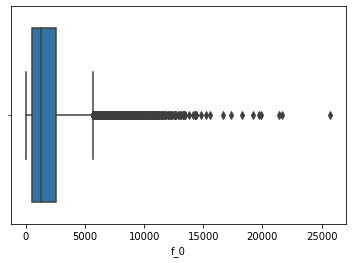

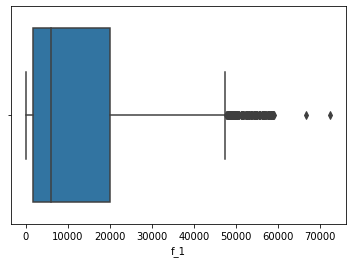

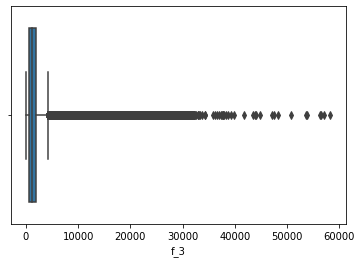

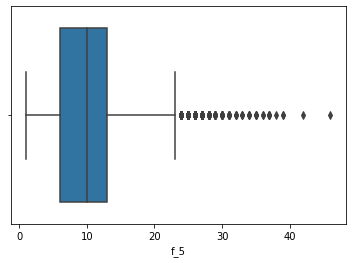

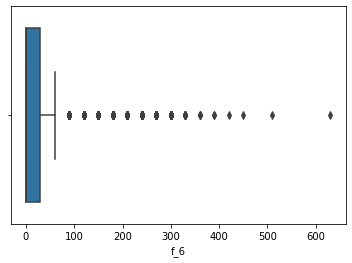

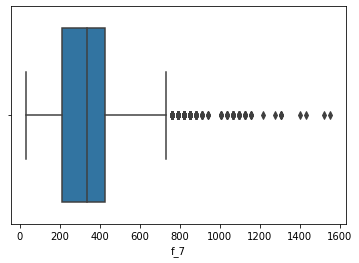

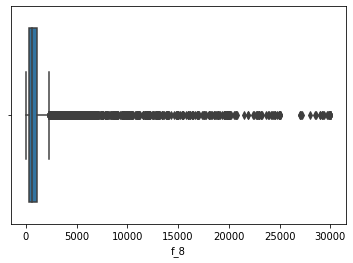

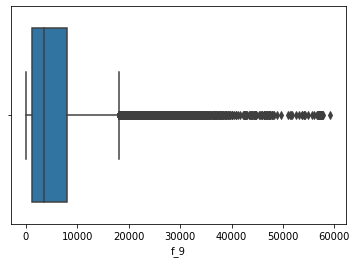

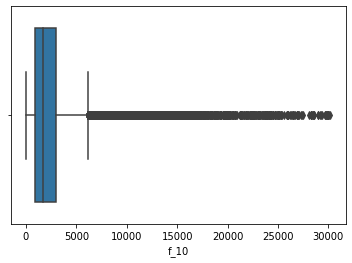

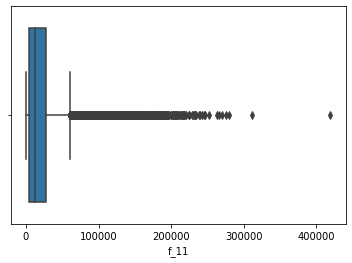

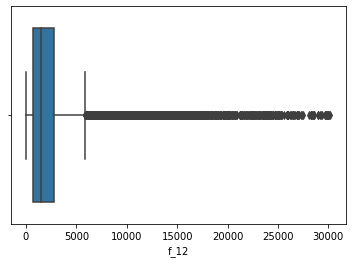

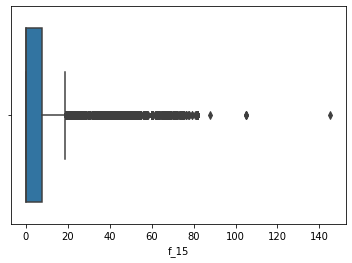

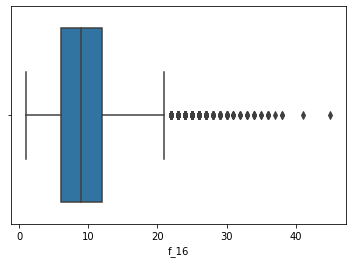

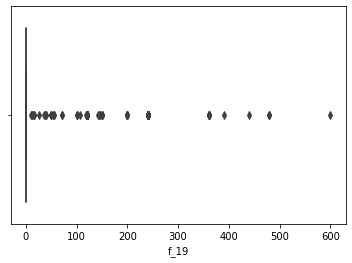

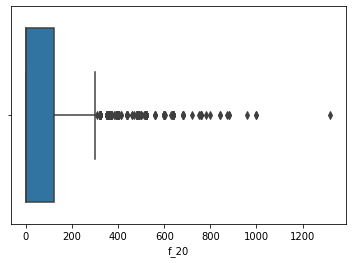

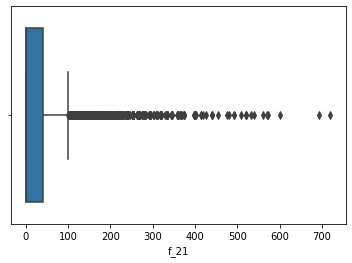

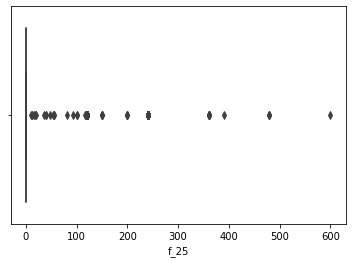

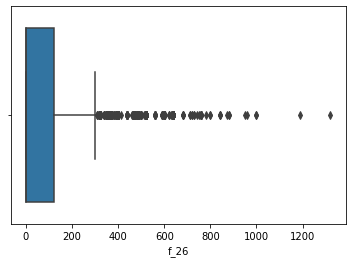

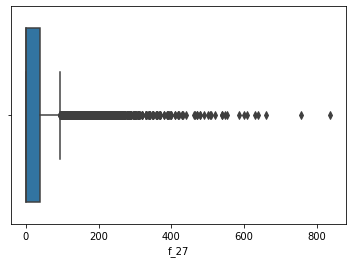

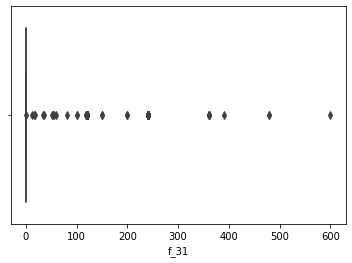

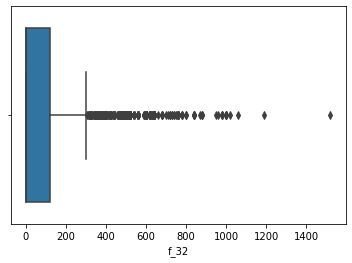

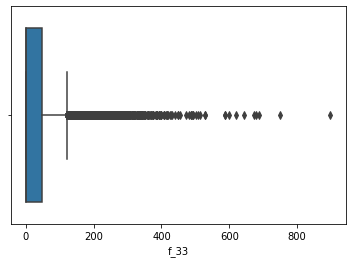

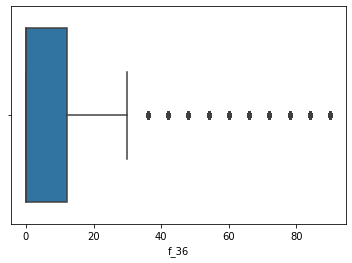

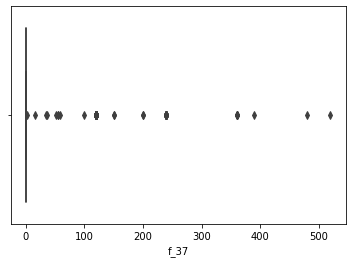

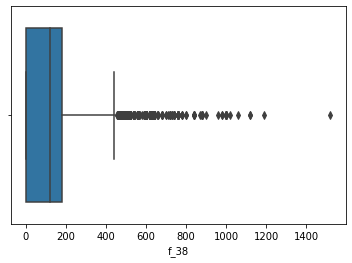

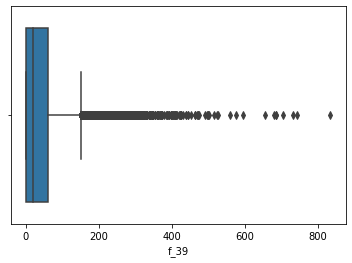

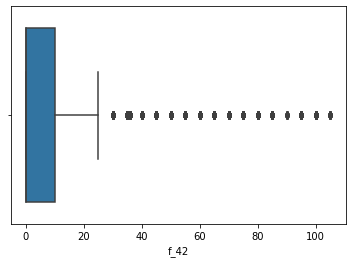

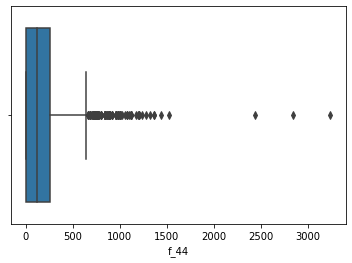

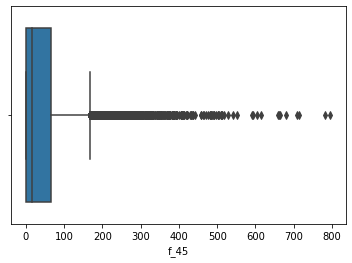

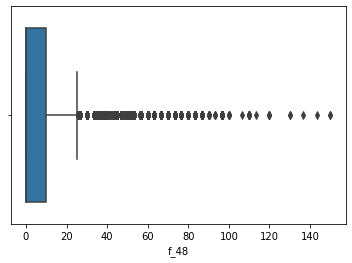

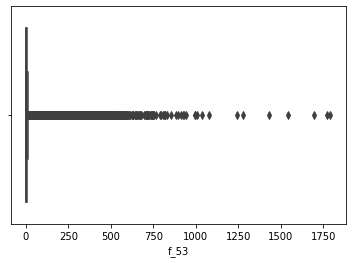

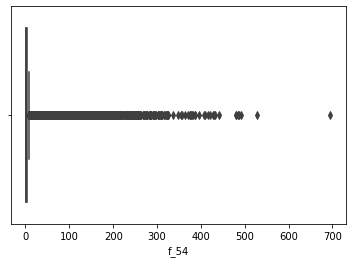

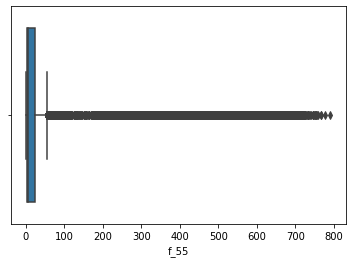

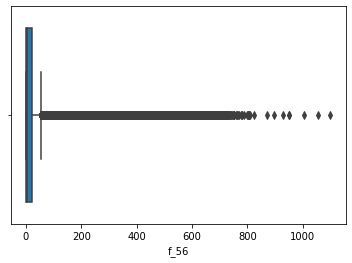

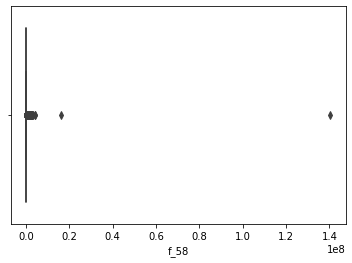

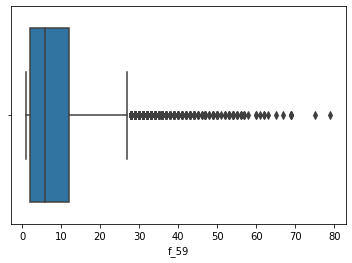

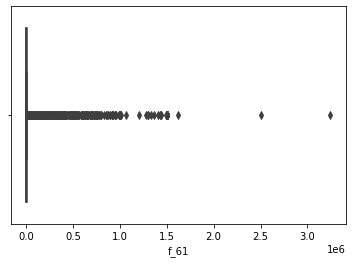

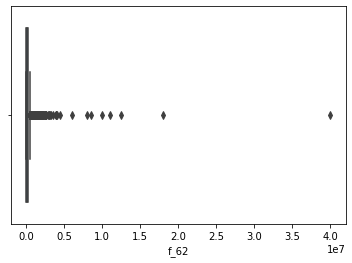

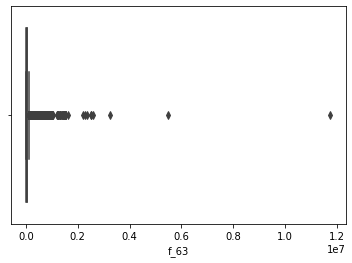

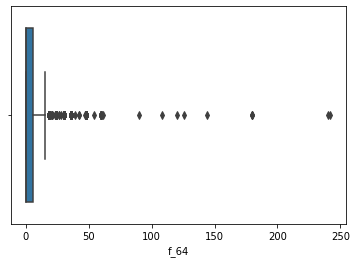

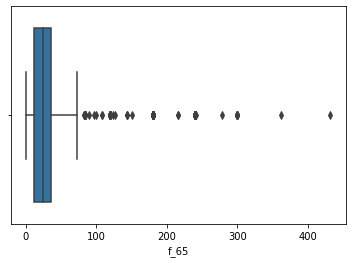

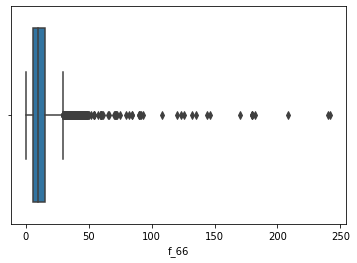

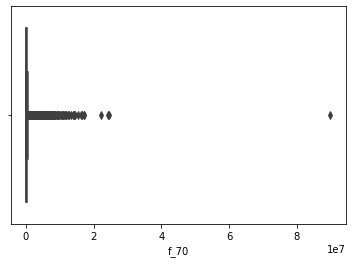

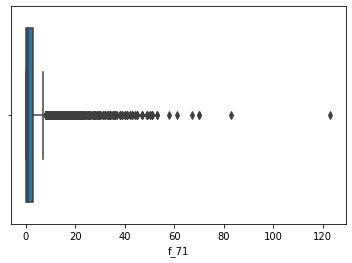

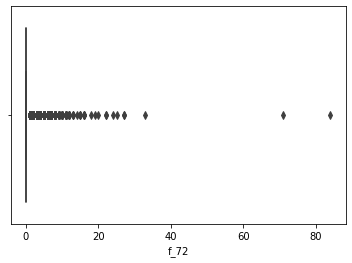

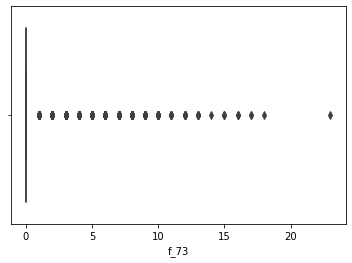

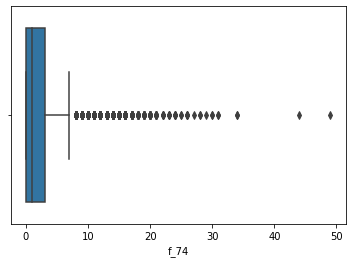

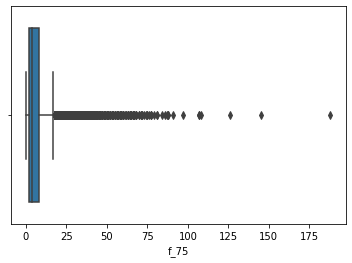

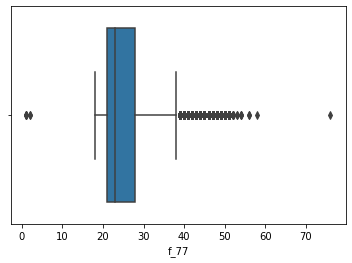

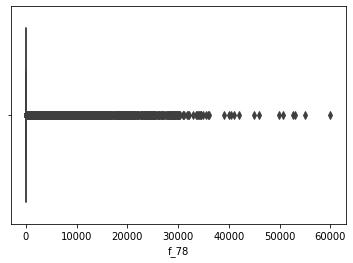

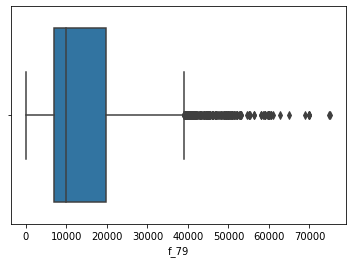

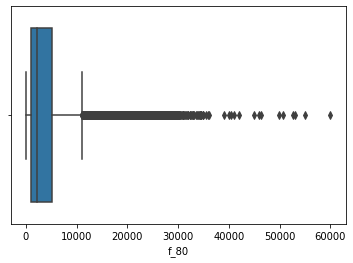

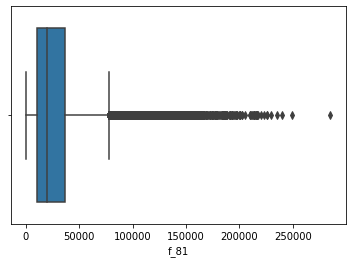

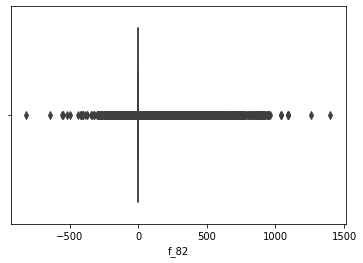

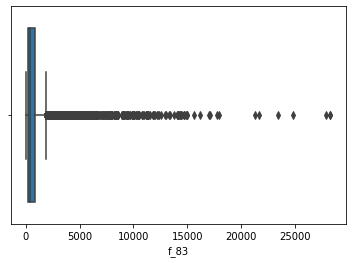

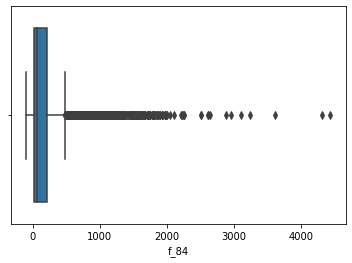

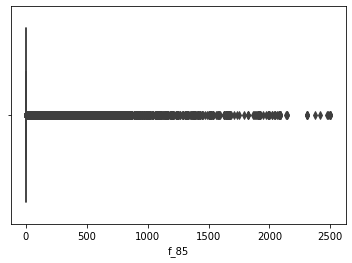

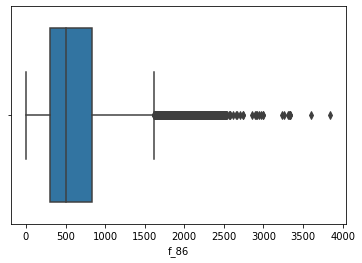

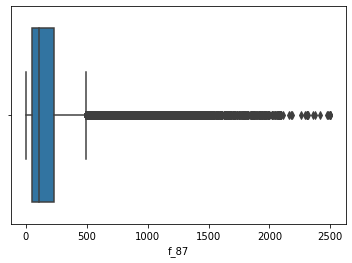

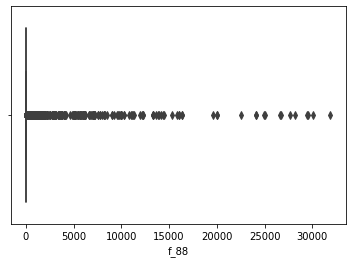

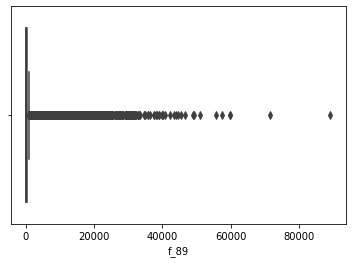

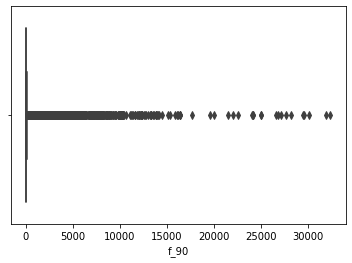

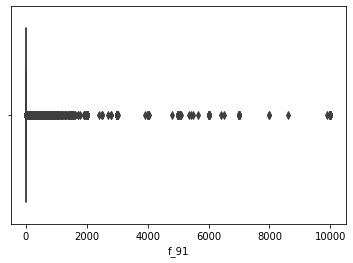

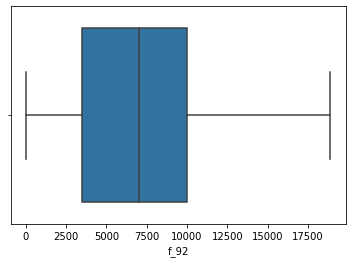

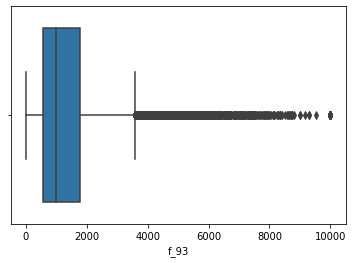

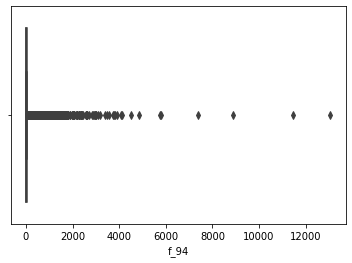

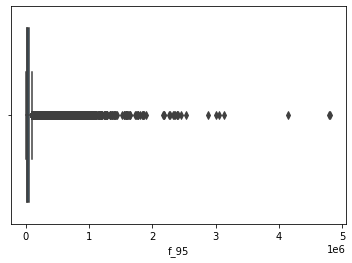

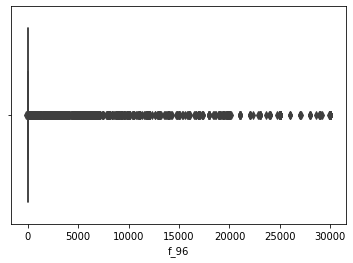

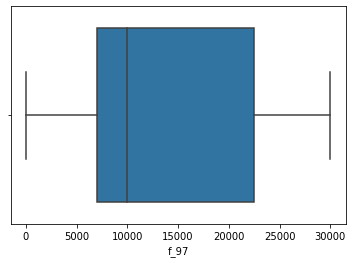

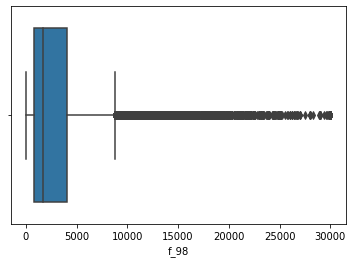

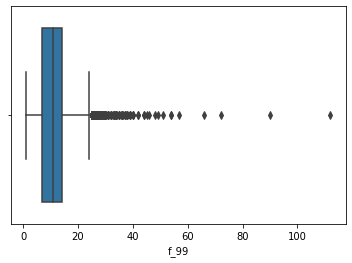

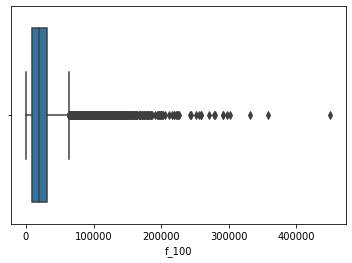

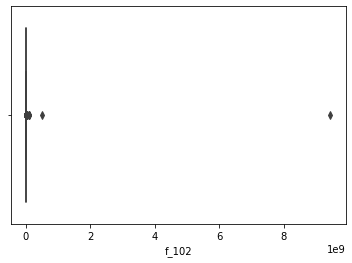

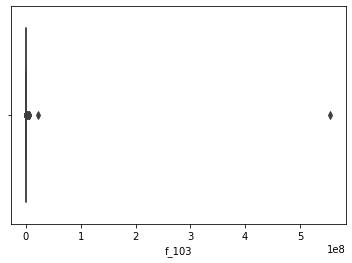

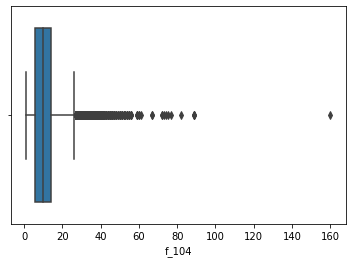

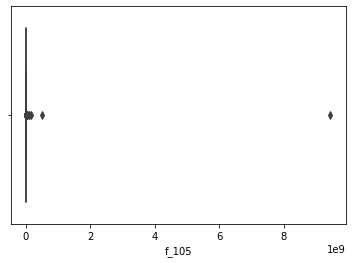

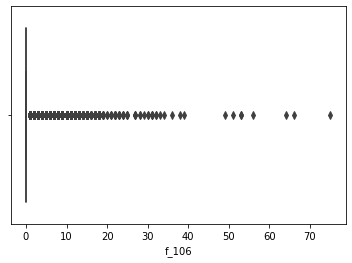

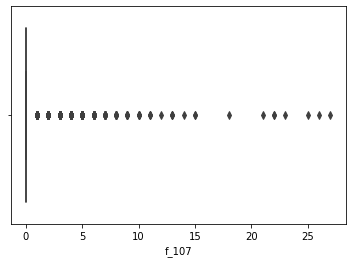

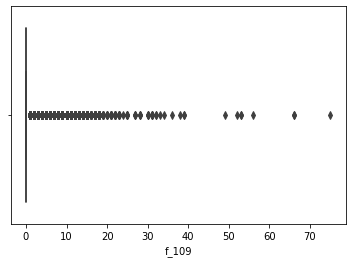

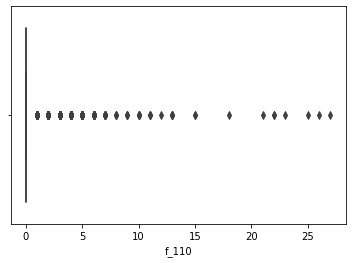

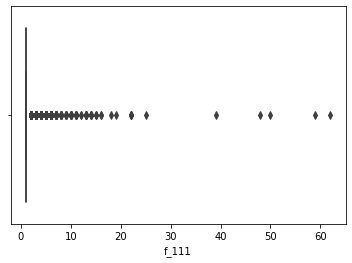

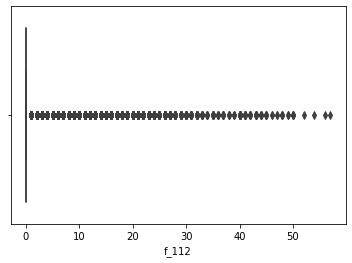

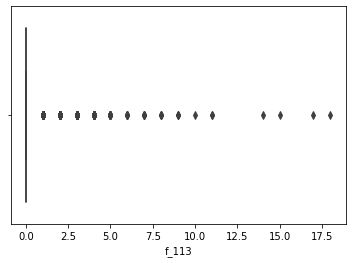

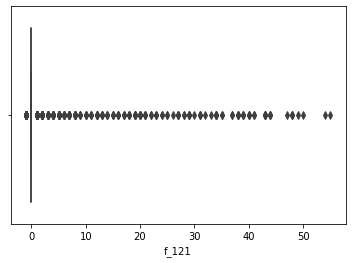

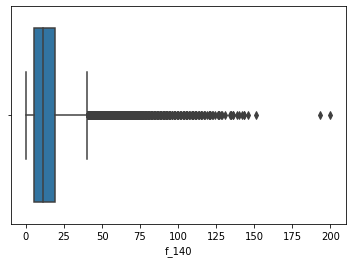

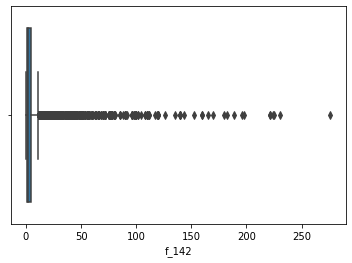

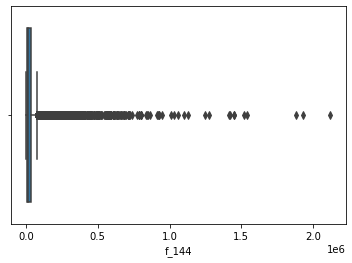

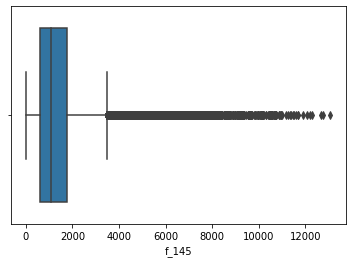

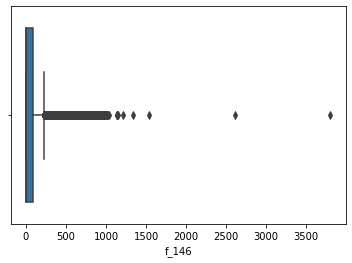

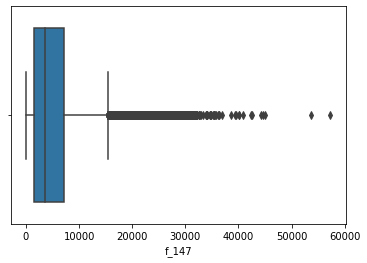

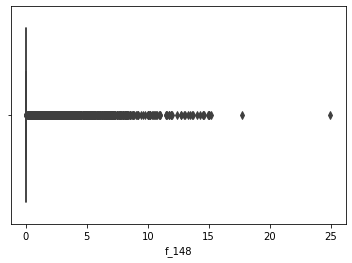

In [9]:
#outliers being the most extreme observations, may include the sample maximum or sample minimum,
# or both, depending on whether they are extremely high or low. However, the sample maximum and 4
#minimum are not always outliers because they may not be unusually far from other observations.

for col in continous:
    plt.figure()
    sns.boxplot(data=X_train, x=col)
    plt.show()

In [10]:
Q1 = X_train[continous].quantile(0.25)
Q3 = X_train[continous].quantile(0.75)
IQR = Q3 - Q1

In [11]:
out = ((X_train[continous] < (Q1 - 1.5 * IQR)) | (X_train[continous] > (Q3 + 1.5 * IQR))).sum()

In [12]:
out.head(10)

f_0     1331
f_1      155
f_3     3523
f_5      458
f_6     8778
f_7      375
f_8     3150
f_9     3941
f_10    4265
f_11    4224
dtype: int64

In [13]:
print("There are " , len(continous), " continous numerical features")
print("There are " , len(descrete), " descrete numerical features")

There are  91  continous numerical features
There are  149  descrete numerical features


<h3>DATA CLEANING </h3>
Removing all columns with more than 50% missing values:<br>
This will allow us to work faster (and our data set is large enough that it will still be meaningful without them.)

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
def removing_null_value_columns(X):
    temp = X.copy()
    print('--------Null Value Transformer started--------')
    for col in temp.columns: 
        per = (temp[col].isnull().sum()/total_len)*100
        if per > 50:
            temp.drop(columns=[col], inplace=True)
    print('--------Null Value Transformer finished--------')
    return temp

<h2>FEATURE ENGINEERING</h2>

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<h3>Imputer</h3>

In [33]:
class DataFrameImputer(BaseEstimator, TransformerMixin):
    """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

    """

    def __init__(self):
    
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].mode()[0]
            if len(list(X[c].unique())) < 15 else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        print("------Data Imputer finished---------")
        return X.fillna(self.fill)

IndentationError: ignored

<h3>Outliers</h3>

In [34]:
# replace outliers
def cust_transform(X, n_stdev=3, verbose=True):
    print("--------------Outlier transformer Started--------------------")
    # copy the array
    result = X.copy()
    # enumerate each column
    for c in X.columns:
        # retrieve values for column
        col = X[c]
        #skip for descrete
        if len(list(col.unique())) < 15:
            pass
        # calculate statistics
        mu, sigma = np.mean(col), np.std(col)
        # define bounds
        LL = mu - 2*sigma # Lower limit 
        UL = mu + 2*sigma # Upper limit
        result[c].clip(LL, UL)
    print("--------------Outlier transformer finish--------------------")
    return result

In [35]:
xt_out = FunctionTransformer(cust_transform).fit_transform(xt)

--------------Outlier transformer Started--------------------
--------------Outlier transformer finish--------------------


<h3>Principal component analysis (PCA)</h3>
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

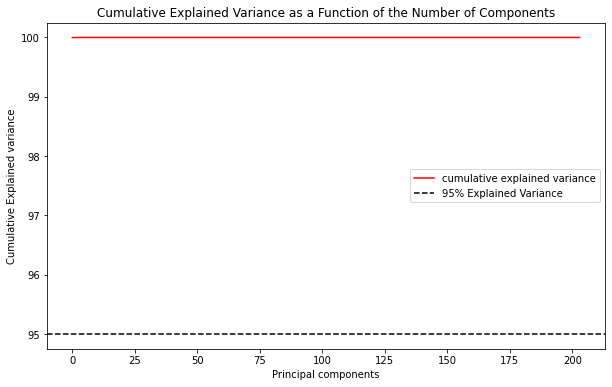

In [36]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(xt_out)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 6))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

<h1> Defining PreProcessing PipeLine</h1>

In [37]:
# Preprocessing for numerical data
preprocessing = Pipeline(steps=[
    ('null_val',FunctionTransformer(removing_null_value_columns) ),
    ('imputer', DataFrameImputer()),
    ('outliers', FunctionTransformer(cust_transform)),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(.95))
])

------Data Imputer---------


In [38]:
x_processed = preprocessing.fit_transform(X_train)

--------Null Value Transformer started--------
--------Null Value Transformer finished--------
------Data Imputer finished---------
--------------Outlier transformer Started--------------------
--------------Outlier transformer finish--------------------


In [40]:
x_processed.shape

(62641, 47)

<h2>Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt_out, train_target, test_size=0.2, random_state=42)

<h1>MODEL </h1>

In [44]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from skopt import forest_minimize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as skm

In [45]:
def xgb_model(params):
    learning_rate = params[0] 
    n_estimators = params[1] 
    max_depth = params[2]
    min_child_weight = params[3]
    gamma = params[4]
    subsample = params[5]
    colsample_bytree = params[6]
    print(params)
    print("----------------------------running-----------------------------------")
    #Model to be optimized
    mdl = XGBClassifier(learning_rate = learning_rate, 
                            n_estimators = n_estimators, 
                            max_depth = max_depth, 
                            min_child_weight = min_child_weight, 
                            gamma = gamma, 
                            subsample = subsample,
                            objective= 'binary:logistic',
                            colsample_bytree = colsample_bytree, tree_method= 'gpu_hist',seed = 42)


    #Cross-Validation in order to avoid overfitting
    auc = cross_val_score(mdl, x_processed, train_target, cv = 10, scoring = 'roc_auc')

    print(auc.mean())
    # as the function is minimization (forest_minimize), we need to use the negative of the desired metric (AUC)
    return -auc.mean()

In [46]:
space = [(1e-3, 1e-1, 'log-uniform'), # learning rate
          (100, 2000), # n_estimators
          (1, 10), # max_depth 
          (1, 6.), # min_child_weight 
          (0, 0.5), # gamma 
          (0.5, 1.), # subsample 
          (0.5, 1.)] # colsample_bytree 

In [47]:
result = forest_minimize(xgb_model, space, random_state = 42, n_random_starts = 20, n_calls  = 25, verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 1394, 8, 3.9932924209851834, 0.07800932022121827, 0.5779972601681014, 0.5290418060840998]
----------------------------running-----------------------------------
0.7985948957018782
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 71.1766
Function value obtained: -0.7986
Current minimum: -0.7986
Iteration No: 2 started. Evaluating function at random point.
[0.05399484409787437, 1223, 8, 4.540362888980228, 0.010292247147901225, 0.9849549260809973, 0.916221320400211]
----------------------------running-----------------------------------
0.798743710485355
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 63.1036
Function value obtained: -0.7987
Current minimum: -0.7987
Iteration No: 3 started. Evaluating function at random point.
[0.0026587543983272693, 1315, 5, 4.087407548138583, 0.3058265802441405, 0.5035331526098588, 0.5115312125207079]
----------------------------runn

In [51]:
p = result.x

In [52]:
mdl = XGBClassifier(learning_rate = p[0], 
                            n_estimators = p[1], 
                            max_depth = p[2], 
                            min_child_weight = p[3], 
                            gamma = p[3], 
                            subsample = p[4],
                            objective= 'binary:logistic',
                            colsample_bytree = p[5],
                            tree_method= 'gpu_hist',
                            seed = 42)

In [53]:
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

In [54]:
print(skm.classification_report( y_test , y_pred ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12498
         1.0       0.00      0.00      0.00        31

    accuracy                           1.00     12529
   macro avg       0.50      0.50      0.50     12529
weighted avg       1.00      1.00      1.00     12529



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


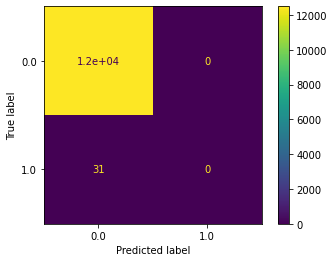

In [55]:
plot_confusion_matrix(mdl, X_test, y_test) 

<h1> Bayesian Optimization </h1>

In [59]:
from skopt import gp_minimize
from skopt.plots import plot_convergence

In [57]:
result_gp = gp_minimize(xgb_model, space, random_state=42, verbose=1, n_calls=30, n_random_starts=1 )

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 449, 8, 3.9842507897324353, 0.22291637642679563, 0.5499874579090015, 0.7296244459829336]
----------------------------running-----------------------------------
0.8005249034467793
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 25.1478
Function value obtained: -0.8005
Current minimum: -0.8005
Iteration No: 2 started. Searching for the next optimal point.
[0.001, 2000, 1, 1.0, 0.5, 1.0, 1.0]
----------------------------running-----------------------------------
0.6725029282534116
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 77.5632
Function value obtained: -0.6725
Current minimum: -0.8005
Iteration No: 3 started. Searching for the next optimal point.
[0.0379401140622982, 457, 7, 4.745151542344923, 0.1826367662187198, 0.5501865119588166, 0.7320127299109478]
----------------------------running-----------------------------------
0.8029749499036363
Iterati

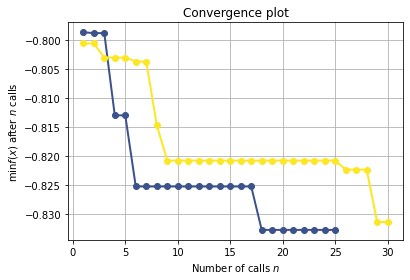

In [60]:
plot_convergence(result, result_gp)

In [64]:
p_gp = result_gp.x

In [63]:
#[0.005922418197936114, 1520, 10, 6.0, 0.0, 0.5, 0.6067154436562684] -> 0.8314
#[0.012013849374287178,640,  4, 5.714267852789906, 0.29943273324426806, 0.8473924665198523, 0.940233919507629] ->0.8327

In [65]:
mdl = XGBClassifier(learning_rate = p_gp[0], 
                            n_estimators = p_gp[1], 
                            max_depth = p_gp[2], 
                            min_child_weight = p_gp[3], 
                            gamma = p_gp[3], 
                            subsample = p_gp[4],
                            objective= 'binary:logistic',
                            colsample_bytree = p_gp[5],
                            tree_method= 'gpu_hist',
                            seed = 42)

In [66]:
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

In [67]:
print(skm.classification_report( y_test , y_pred ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12498
         1.0       0.00      0.00      0.00        31

    accuracy                           1.00     12529
   macro avg       0.50      0.50      0.50     12529
weighted avg       1.00      1.00      1.00     12529



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


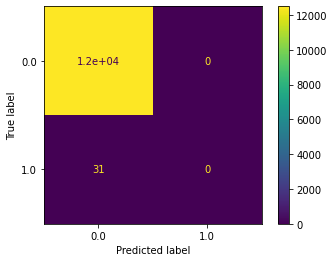

In [68]:
plot_confusion_matrix(mdl, X_test, y_test) 

In [ ]:
#We get a better score using the paramters 
#[0.012013849374287178,640,  4, 5.714267852789906, 0.29943273324426806, 0.8473924665198523, 0.940233919507629] ->0.8327